In [141]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt


In [142]:
#Read data
test_data = pd.read_csv("PA3_test.csv")
train_data = pd.read_csv("PA3_train.csv")
train_final_data = pd.read_csv("PA3_train_final.csv")
#Extracting only the text from the train data first iteration
train_text = train_data.iloc[:, 1]
#Formatting the target data such as if the given data differs mark the given data as -1
train_target = train_data.iloc[:,0]
train_target = train_target.str.split('/',expand=True)
train_target_combined = pd.to_numeric(np.where(train_target[0] == train_target[1], train_target[0], -1))
#Format for final data
train_text_final = train_final_data.iloc[:,1]
#Combining target data to single column 
train_target_final = train_final_data.iloc[:,0]
train_target_final = train_target_final.str.split('/',expand=True)
train_target_final['combined'] = np.where(train_target_final[0] == train_target_final[1], train_target_final[0], -1)
train_target_final['combined'] = pd.to_numeric(np.where(train_target_final['combined'] == train_target_final[2], train_target_final[0], -1))
train_target_final['best'] = pd.to_numeric(train_target_final[0])
#Seperating the test data to text and target
test_text = test_data.iloc[:,1]
test_target = test_data.iloc[:,0]



Training models on the given data

In [143]:
#Pipeline for vectoriz and classifier
#Using a combined target data for training
result = []
result_combined = []
result_final = []

for i in range (1, 50):
    alpha = i/10
    text_clf = Pipeline([
                ('tfidfvect', TfidfVectorizer(stop_words='english')),
                ('clf', MultinomialNB(alpha = alpha)) 
                ])
    text_clf.fit(train_text, train_target_combined)
    result.append((alpha,text_clf.score(test_text, test_target)))
    text_clf.fit(train_text_final,train_target_final['combined'])
    result_combined.append((alpha, text_clf.score(test_text, test_target)))
    text_clf.fit(train_text_final,train_target_final['best'])
    result_final.append((alpha, text_clf.score(test_text, test_target)))




In [155]:

max_accuracy = 0
best_alpha = 0
for alpha, accuracy in result_final:
    if(accuracy>=max_accuracy):
        max_accuracy = accuracy
        best_alpha = alpha
    
print(f"Highest accuracy with human marking data: {max_accuracy}")
print(f"alpha: {best_alpha}")

Highest accuracy with human marking data: 0.9462857142857143
alpha: 1.1


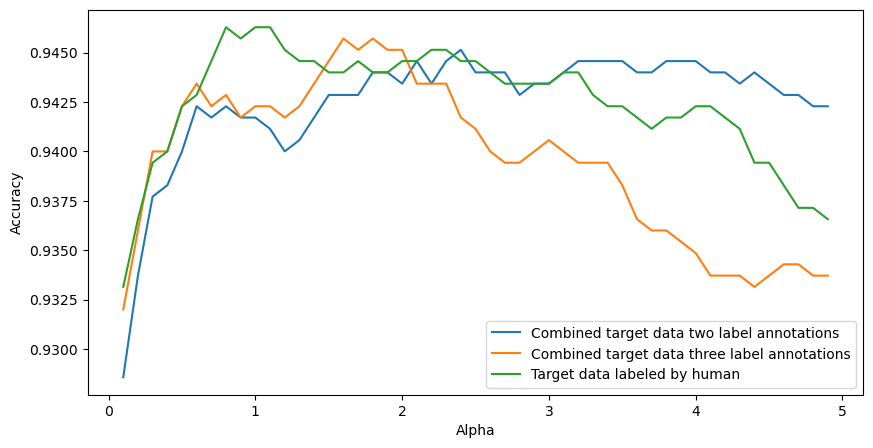

In [154]:
plt.figure(figsize=(10, 5))
plt.plot(*zip(*result),label='Combined target data two label annotations')
plt.plot(*zip(*result_combined), label='Combined target data three label annotations')
plt.plot(*zip(*result_final),label='Target data labeled by human' )
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()